In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/sample_data/dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,subscription_age_group_Q2,subscription_age_group_Q3,subscription_age_group_Q4,churn
0,0,0.475764,-0.708110,-0.749522,0.071962,0.773664,-0.335383,2.323813,1.462349,-0.208744,-0.590608,-0.564849,-0.574473,0.0
1,1,0.475764,-0.708110,0.552711,0.296137,-0.788213,-0.335383,0.442773,-0.040668,-0.208744,-0.590608,-0.564849,1.740725,1.0
2,2,-2.101882,-0.708110,-0.271050,0.296137,-0.788213,-0.335383,-0.663188,-0.418910,-0.208744,1.693170,-0.564849,-0.574473,1.0
3,3,0.475764,1.412209,-0.818580,-0.301664,0.983917,-0.335383,0.175348,-0.080483,-0.208744,-0.590608,-0.564849,-0.574473,0.0
4,4,0.475764,1.412209,-0.902436,0.370862,1.239223,-0.335383,0.057500,0.277852,-0.208744,-0.590608,-0.564849,-0.574473,0.0


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,0
service_failure_count,0
download_avg,0
upload_avg,0
download_over_limit,0


In [ ]:
# Drop rows where 'churn' is NaN first to avoid 'loss: nan'
df.dropna(subset=['churn'], inplace=True)

X=df.drop(['churn', 'Unnamed: 0'], axis=1) # Drop 'Unnamed: 0' column
y=df['churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(29813, 12)

In [ ]:
from keras.layers import Input, Dropout
model = Sequential([
    Input(shape=(12,)),
    Dense(15, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stoping=EarlyStopping(monitor='val_accuracy', patience=10, mode='max')
model_checkpoint=ModelCheckpoint('keras_model.keras', save_best_only = True)

In [ ]:
from keras import callbacks
model.compile(
    optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
history = model.fit(X_train, y_train, epochs = 50, batch_size=64, validation_data=(X_test, y_test),
                    callbacks=[early_stoping, model_checkpoint])

Epoch 1/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7202 - loss: 0.5573 - val_accuracy: 0.8867 - val_loss: 0.3130
Epoch 2/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8816 - loss: 0.3201 - val_accuracy: 0.9002 - val_loss: 0.2781
Epoch 3/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9010 - loss: 0.2809 - val_accuracy: 0.9080 - val_loss: 0.2634
Epoch 4/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9069 - loss: 0.2714 - val_accuracy: 0.9125 - val_loss: 0.2536
Epoch 5/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9111 - loss: 0.2574 - val_accuracy: 0.9163 - val_loss: 0.2455
Epoch 6/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9184 - loss: 0.2440 - val_accuracy: 0.9185 - val_loss: 0.2386
Epoch 7/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9206 - loss: 0.2370 - val_accuracy: 0.9217 - val_loss: 0.2318
Epoch 8/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9215 - loss: 0.2400 - val_accuracy: 0.

In [ ]:
from keras.models import load_model
best_model = load_model('keras_model.keras')
y_pred = best_model.predict(X_test)

400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:

acc = best_model.evaluate(X_test, y_test)[1]
print(f"Accuracy: {acc}")

400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9455 - loss: 0.1720
Accuracy: 0.945135772228241


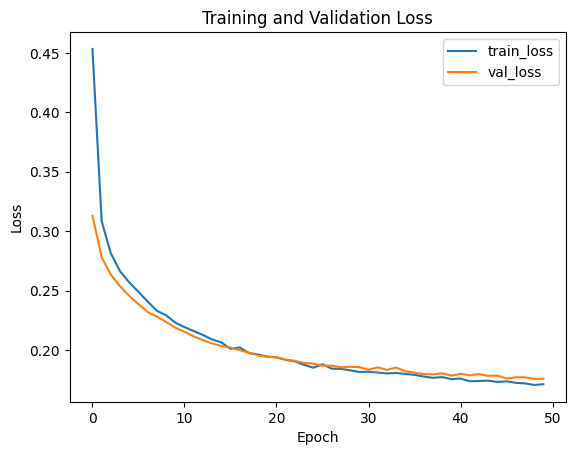

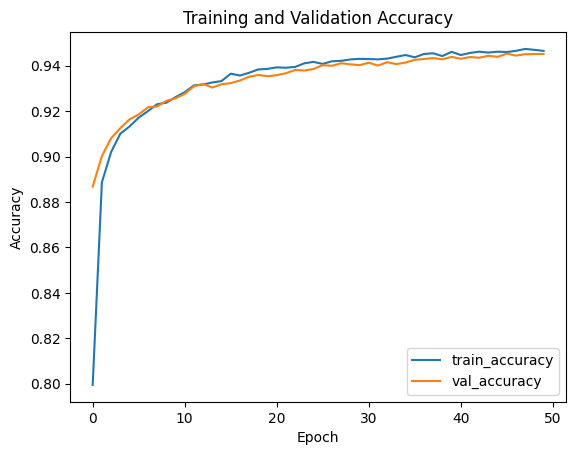

In [ ]:
import matplotlib.pyplot as plt

# Plot train vs test loss during training
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot train vs test accuracy during training
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      5665
         1.0       0.98      0.92      0.95      7112

    accuracy                           0.95     12777
   macro avg       0.94      0.95      0.94     12777
weighted avg       0.95      0.95      0.95     12777

